# Total cases/deaths of COVID-19 and case/death rate anlyzes in state level (admin1) 

This Notebook studys the cases and deaths due COVID-19 in Mexico.

It shows how the cases and deaths appear since the beggining of the pandemic through the data provide by  [CONACYT](https://datos.covid-19.conacyt.mx/#DownZCSV).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Covid cases analyzes

Read registered cases for Mexican states from csv file

In [2]:
dfCases = pd.read_csv('../Data/Casos_Diarios_Municipio_Confirmados_20210810.csv')

Determinating the size of the cases dataframe

In [3]:
numStates,locLastDateCases=dfCases.shape

Remove the national numbers from the dataframes

In [4]:
dfCases = dfCases.query("nombre != 'Nacional'").copy()

Compute the total cases per municipality since the first day registered to the last day

In [5]:
dfCases['total_cases'] = dfCases.iloc[:,3:locLastDateCases].sum(axis=1)

Compute the case rate per municipality for each 100000 persons

In [6]:
dfCases['case_rate'] = (dfCases['total_cases']/dfCases['poblacion'])*100000

Compute the total cases per state since the 60 days before the last day registered

In [7]:
dfCases['total_cases_last_60_days'] = dfCases.iloc[:,locLastDateCases-59:locLastDateCases].sum(axis=1)

Compute the case rate per state for each 100000 persons in the last 60 days

In [8]:
dfCases['case_rate_last_60_days'] =(dfCases['total_cases_last_60_days']/ dfCases['poblacion'])*100000 #using as reference the las day

Rename columns for easier interpretation

In [9]:
dfCases.rename(columns = {'nombre': 'municipality', 'poblacion': 'population'}, inplace=True)

## Covid deaths analyzes

Read registered cases for Mexican states from csv file

In [10]:
dfDeaths = pd.read_csv('../data/Casos_Diarios_Municipio_Defunciones_20210810.csv')

Determinating the size of the deaths dataframe

In [11]:
numStates,locLastDateDeaths=dfDeaths.shape

Remove the national numbers from the dataframes

In [12]:
dfDeaths = dfDeaths.query("nombre != 'Nacional'").copy()

Compute the total deaths per municipality since the first day registered to the last day

In [13]:
dfDeaths['total_deaths'] = dfDeaths.iloc[:,3:locLastDateDeaths].sum(axis=1)

Compute the death rate per municipality for each 100000 persons

In [14]:
dfDeaths['death_rate'] = (dfDeaths['total_deaths']/dfDeaths['poblacion'])*100000 #total/population*100,000

Compute the total deaths per municipality since the 60 days before the last day registered

In [15]:
dfDeaths['total_deaths_last_60_days'] = dfDeaths.iloc[:,locLastDateDeaths-59:locLastDateDeaths].sum(axis=1)

Compute the death rate per municipality for each 100000 persons in the last 60 days

In [16]:
dfDeaths['death_rate_last_60_days'] = (dfDeaths.loc[:,'total_deaths_last_60_days']/dfDeaths.loc[:,'poblacion'])*100000

Rename columns for easier interpretation

In [17]:
dfDeaths.rename(columns = {'nombre': 'municipality', 'poblacion': 'population'}, inplace=True)

### Plot of top 10 municipalities with the most largest populations

Utilizing any of the previous dataframes we can see the top 10 municipalities with the most largest populations

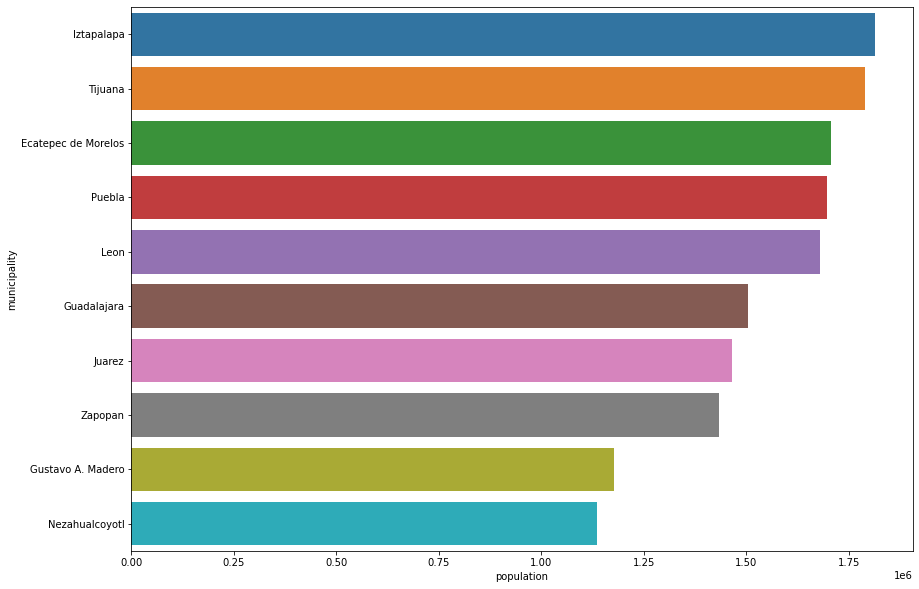

In [18]:
plt.figure(figsize=(14,10))
top10largestPopulations = sns.barplot(x="population", y="municipality", data=dfCases.nlargest(10, 'population').copy())
top10largestPopulations = top10largestPopulations.get_figure()
sns.set_context('paper', font_scale=2)
top10largestPopulations.savefig("../figures/top10largestPopulated_municipalities.png", bbox_inches="tight")

### Plot of total cases for each municipality 

By sorting the dataframe in ascending order of the municipality with highest cases, the next barplot is obtain

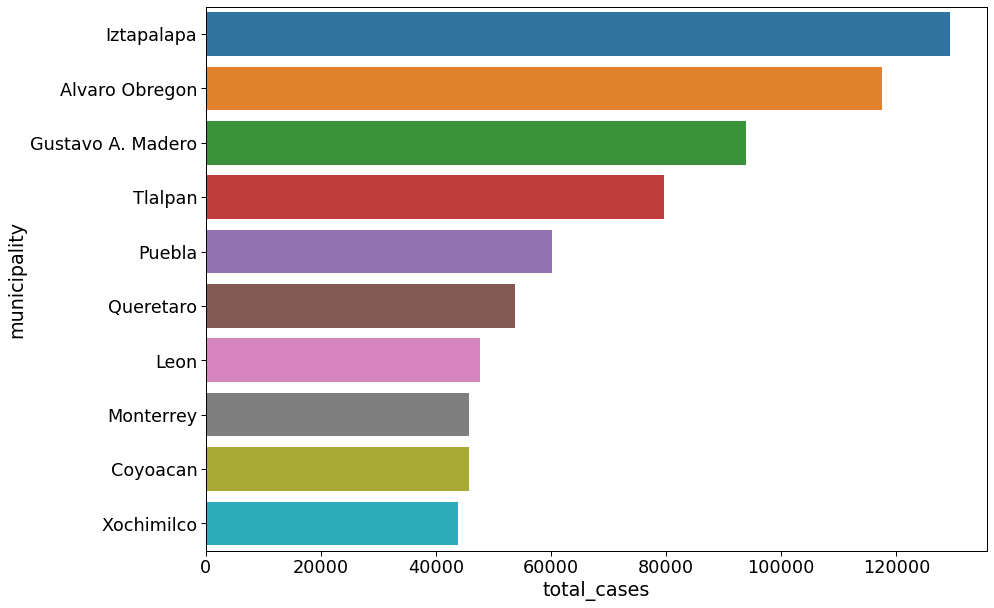

In [19]:
dfCasesSorted = dfCases
dfCasesSorted.sort_values('total_cases',inplace=True, ascending=False)
plt.figure(figsize=(14,10))
totalCases = sns.barplot(x="total_cases", y="municipality", data=dfCasesSorted.nlargest(10, 'total_cases').copy())
totalCases = totalCases.get_figure()
sns.set_context('paper', font_scale=1)
totalCases.savefig("../figures/top10highest_total_cases_municipalities.png", bbox_inches="tight")

### Plot of top 10 municipalities with the highest case rate

With the cases dataframe we can obtain the top 10 municipalities with the highest cases rate as following

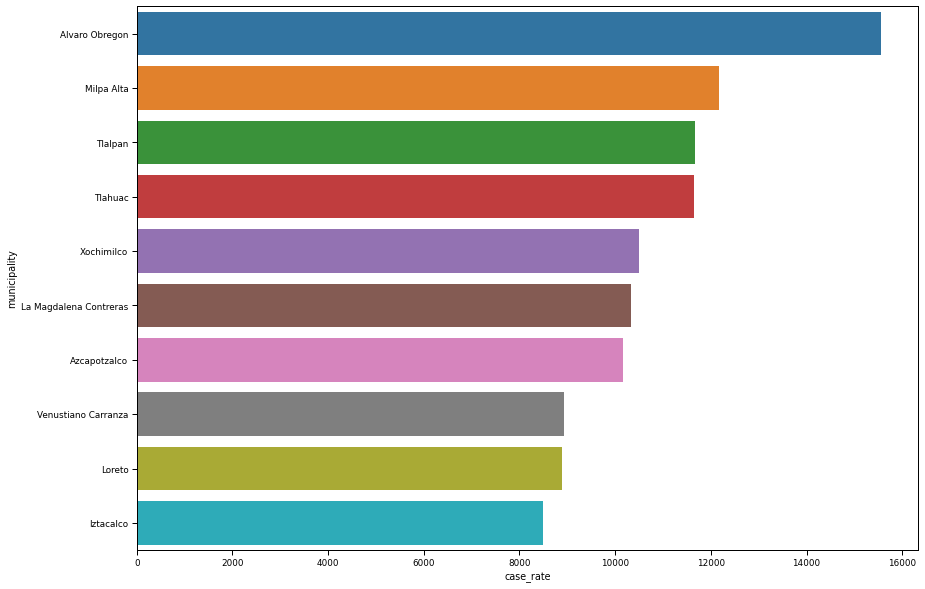

In [20]:
dfCasesSorted.sort_values('case_rate',inplace=True, ascending=False)
plt.figure(figsize=(14,10))
casesRate = sns.barplot(x="case_rate", y="municipality", data=dfCasesSorted.nlargest(10, 'case_rate').copy())
sns.set_context('paper', font_scale=0.75) 
casesRate = casesRate.get_figure()
casesRate.savefig("../figures/top10highest_cases_rate_municipalities.png", bbox_inches="tight")



With the deaths dataframe we can obtain the top 10 municipalities with the highest deaths as following

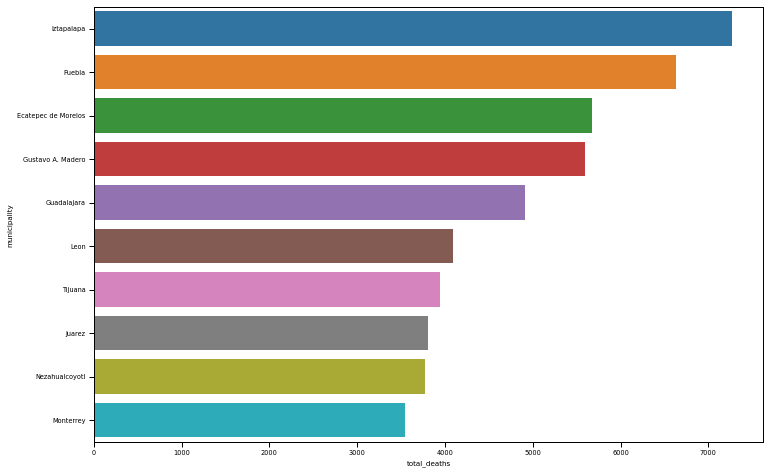

In [21]:
dfDeathsSorted = dfDeaths
dfDeathsSorted.sort_values('total_deaths',inplace=True, ascending=False)
plt.figure(figsize=(12,8))
totalDeaths = sns.barplot(x="total_deaths", y="municipality", data=dfDeathsSorted.nlargest(10, 'total_deaths').copy())
totalDeaths = totalDeaths.get_figure()
sns.set_context('paper', font_scale=1) 
totalDeaths.savefig("../figures/top10highest_total_deaths_municipalities.png", bbox_inches="tight")

### Plot of top 10 municipalities with the highest death rate

With the deaths dataframe we can obtain the top 10 states with the highest deaths rate as following

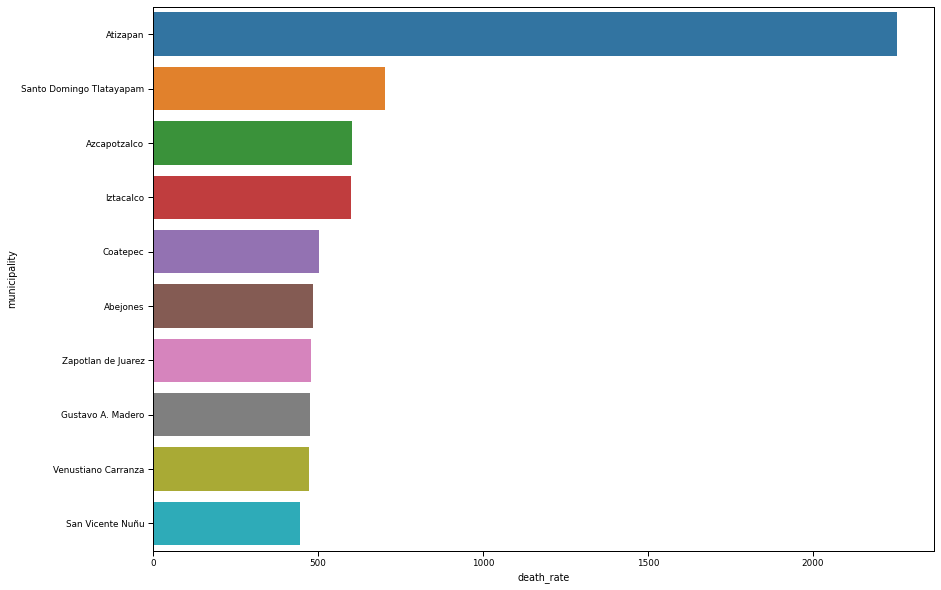

In [22]:
dfDeathsSorted.sort_values('death_rate',inplace=True, ascending=False)
plt.figure(figsize=(14,10))
deathsRate = sns.barplot(x="death_rate", y="municipality", data=dfDeathsSorted.nlargest(10, 'death_rate').copy())
deathsRate = deathsRate.get_figure()
sns.set_context('paper', font_scale=0.5)
deathsRate.savefig("../figures/top10highest_cases_rate_municipalities.png", bbox_inches="tight")

### Plot of top 10 with with the lowest case rate

With the cases dataframe we can obtain the top 10 municipalities with the lowest cases rate as following

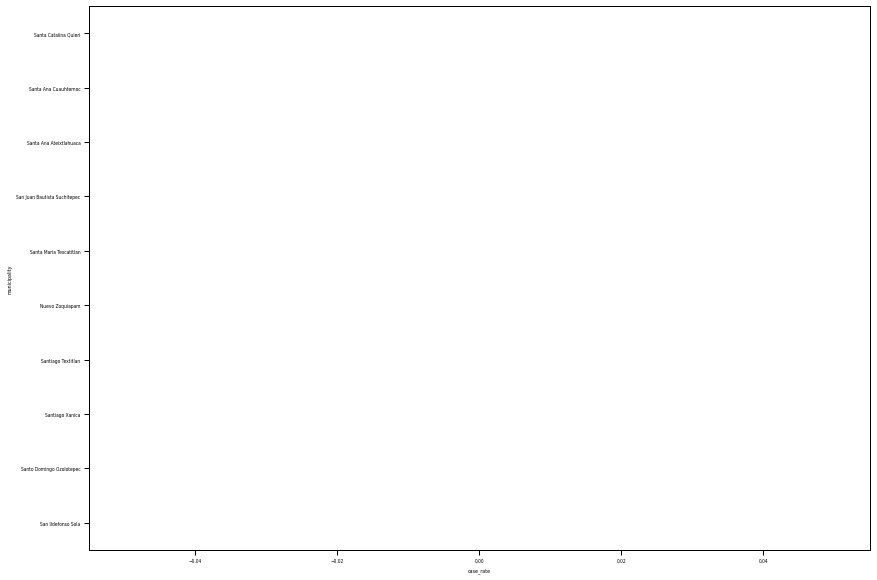

In [23]:
plt.figure(figsize=(14,10))
top10smallestCasesRate = sns.barplot(x="case_rate", y="municipality", data=dfCases.nsmallest(10, 'case_rate').copy())
top10smallestCasesRate = top10smallestCasesRate.get_figure()
sns.set_context('paper', font_scale=3)
top10smallestCasesRate.savefig("../figures/top10lowest_case_rate_municipalities.png", bbox_inches="tight")

### Plot of top 10 municipalities with the lowest death rate

With the deaths dataframe we can obtain the top 10 municipalities with the lowest deaths rate as following

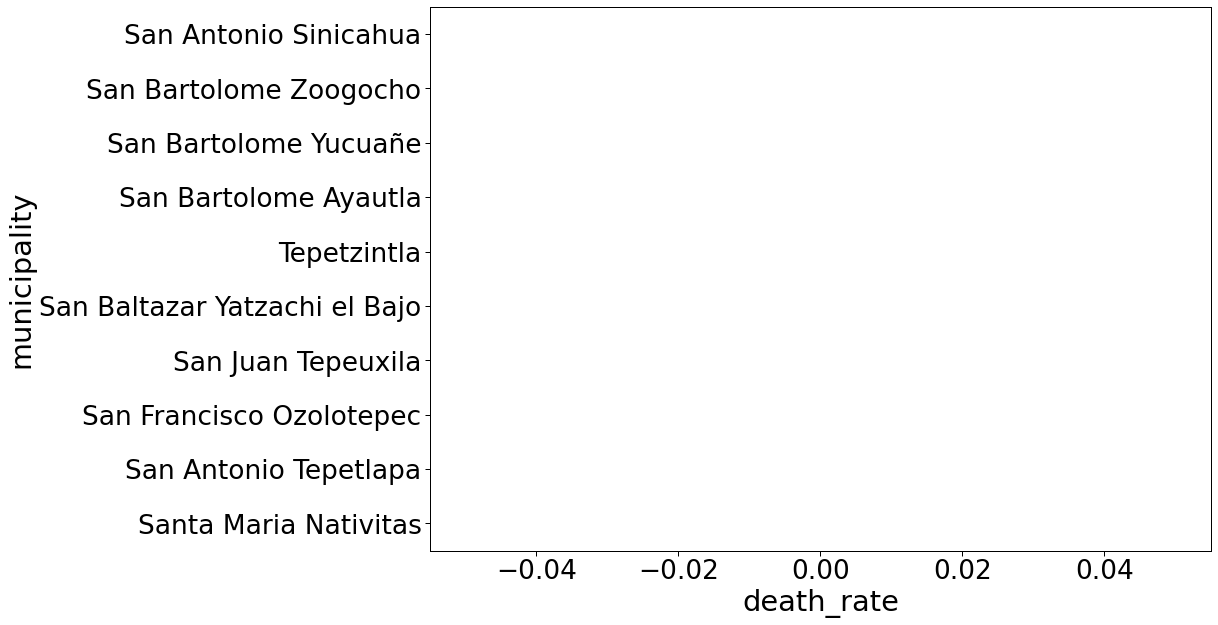

In [24]:
plt.figure(figsize=(14,10))
top10smallestDeathsRate = sns.barplot(x="death_rate", y="municipality", data=dfDeaths.nsmallest(10, 'death_rate').copy())
top10smallestDeathsRate = top10smallestDeathsRate.get_figure()
sns.set_context('paper', font_scale=1)
top10smallestDeathsRate.savefig("../figures/top10lowest_death_rate_municipalities.png", bbox_inches="tight")

### Plot of top 10 municipalities with the highset case rate in the last 60 days

With the cases dataframe we can obtain the top 10 municipalities with the highest cases rate the last 60 days as following

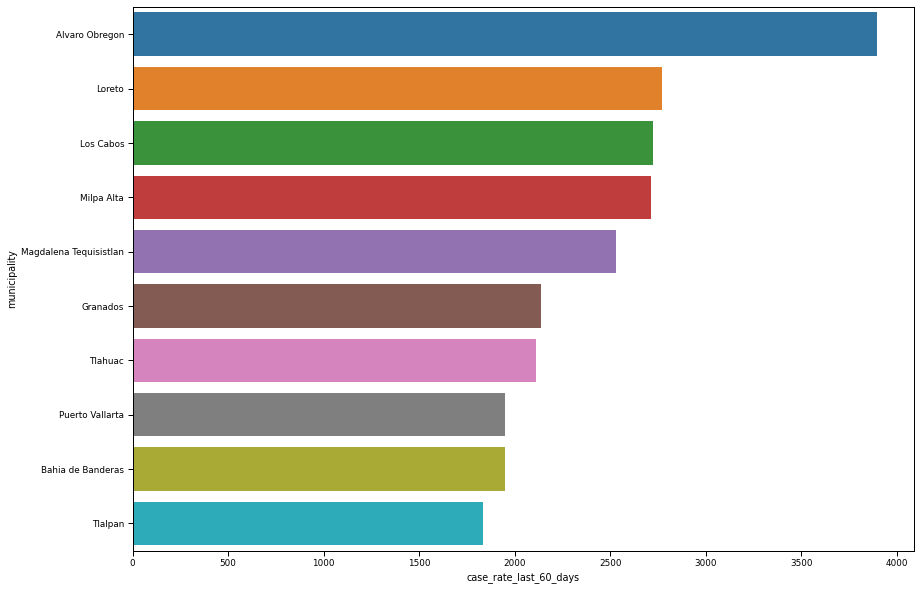

In [25]:
plt.figure(figsize=(14,10))
top10casesRate60 = sns.barplot(x="case_rate_last_60_days", y="municipality", data=dfCases.nlargest(10,'case_rate_last_60_days').copy())
sns.set_context('paper', font_scale=2)
top10casesRate60 = top10casesRate60.get_figure()
top10casesRate60.savefig("../figures/top10highset_case_rate_Last_60_days_municipalities.png", bbox_inches="tight")

### Plot of top 10 municipalities with the highset death rate in the last 60 days

In the deaths dataframe we can obtain the top 10 municipalities with the highest deaths rate the last 60 days as following

AttributeError: 'NoneType' object has no attribute 'savefig'

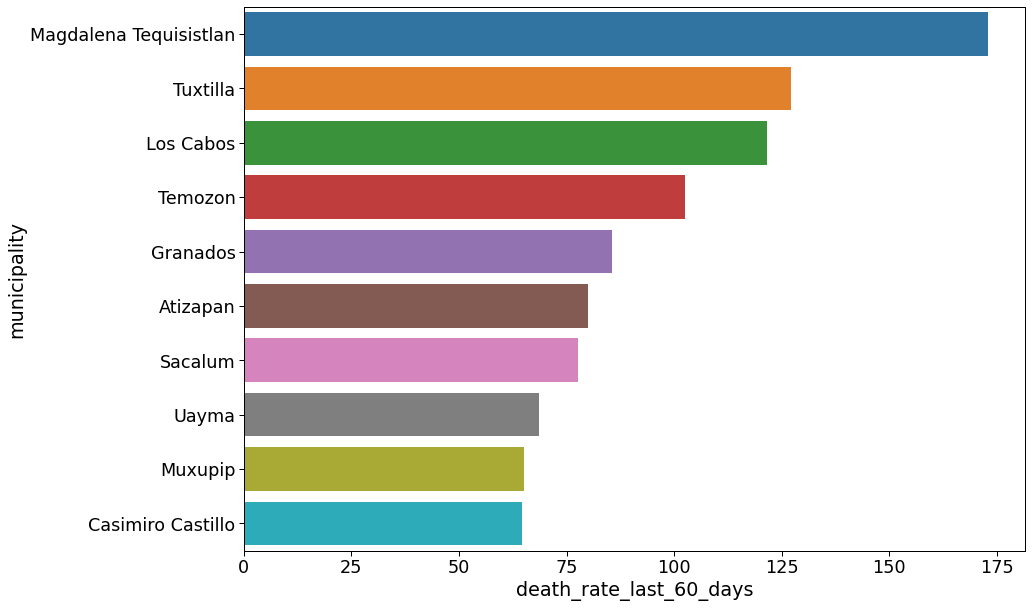

In [30]:
plt.figure(figsize=(14,10))
top10deathsRate60 = sns.barplot(x="death_rate_last_60_days", y="municipality", data=dfDeaths.nlargest(10,'death_rate_last_60_days').copy())
top10deathsRate60 = top10casesRate60.get_figure()        
sns.set_context('paper', font_scale=2)
top10deathsRate60 = top10deathsRate60.savefig("../figures/top10highset_death_rate_Last_60_days_municipalities.png", bbox_inches="tight")

To see the correlation of deaths-cases the merged of both of the dataframes is perfomed.

In [ ]:
dfAll = pd.merge(dfCases,dfDeaths,on='cve_ent')

The correlation between the total deaths and cases is the following

In [ ]:
plt.figure(figsize=(14,10))
totalCasesDeaths = sns.regplot(x="total_cases", y="total_deaths", data=dfAll)
totalCasesDeaths = totalCasesDeaths.get_figure()
sns.set_context('paper', font_scale=2)
totalCasesDeaths.savefig("../figures/totalCases-totalDeaths_municipalities.png", bbox_inches="tight")

The correlation between the deaths and cases rate is the following

In [ ]:
plt.figure(figsize=(14,10))
casesDeathsRate = sns.regplot(x="case_rate", y="death_rate", data=dfAll)
casesDeathsRate = casesDeathsRate.get_figure()
sns.set_context('paper', font_scale=2)
casesDeathsRate.savefig("../figures/deathRate-caseRate_municipalities.png", bbox_inches="tight")

The correlation between the deaths and cases rate in the last 60 days is the following

In [ ]:
plt.figure(figsize=(14,10))
deathsCasesRate60 = sns.regplot(x="case_rate_last_60_days", y="death_rate_last_60_days", data=dfAll)
deathsCasesRate60  = deathsCasesRate60 .get_figure()
sns.set_context('paper', font_scale=2)
deathsCasesRate60.savefig("../figures/deathRate60-caseRate60_municipalities.png", bbox_inches="tight")

The most important data of this week analyzes is seperated and preparated to store.

In [ ]:
dfFinal = dfAll[['cve_ent','municipality_x','population_x',
                 'total_cases','case_rate','total_cases_last_60_days','case_rate_last_60_days',
                 'total_deaths','death_rate','total_deaths_last_60_days','death_rate_last_60_days']].copy()

The data to store is cleaned and sorted for a future easier interpretation.

In [ ]:
dfFinal.rename(columns = {'municipality_x': 'municipality', 'population_x': 'population'}, inplace=True)
dfFinal.sort_values(by=['municipality'], ascending = True, inplace=True)
dfFinal

The data analyzes of this week is stored.

In [ ]:
dfFinal.to_csv('../data/week1analyzesMunicipalities.csv',index=False)

Due the quantity and complexity of which municipalty is part of which state is hard to analyzes the data smoothly as the state data so the assumptions of the state data, but even tough it was clear that some anormalities where detected in the municipality data such as that in the last 60 days some of the municipalities have not register any cases or deaths which lead to assume that is probably due to the fact that people are getting vaccinated which is decreasing the rate of people going to a hospital because of the disease or also because those municipalities are taking more precautions to prevent the infection to reach it's population